# Linear regression 

In this notebook we will use the correlationtechnique linear regression to predict the relation between the log number of shares and article received. 

What is a linear regression model?

With linear regression technique we can make make a model that predicts the value of $Y$ through a linear relationship from $X$. With the linear regression model we determine the regression line. This line is the most favorable line to describe the relation between $Y$ (dependent variable) and $X$ (independent predictor). 

$\epsilon$ represents the distance between the the regression line and the datapoint. 

$a$ represents the value of $Y$ when $X = 0$.

$b$ reflects the value of the slope of the regression line, and represents the mean value of $Y$ when $X$ increases with one unit. 

The linear regression line is estimated using the following formula:

$Y = a+b \times X + \epsilon$

In [567]:
import seaborn as sns
import sklearn as sk 
import pandas as pd
import matplotlib.pyplot as plt 
import math
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [568]:
df = pd.read_csv('true.csv')
df = df.sort_values(by='shares', ascending=False) #sort the data set to see the biggest channels first

df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
15508,15509,http://mashable.com/2013/07/03/low-cost-iphone/,12,688,15,1,4.893895,0,0,0,...,0,0,0,0,0.503345,0.186037,0.100000,-0.300000,843300,5.925982
16736,16737,http://mashable.com/2013/04/15/dove-ad-beauty-...,11,893,0,11,4.586786,0,0,1,...,0,0,0,0,0.450678,0.100533,0.000000,0.000000,690400,5.839101
22572,22573,http://mashable.com/2014/04/09/first-100-gilt-...,13,2591,1,1,4.588962,0,0,0,...,0,0,0,0,0.415273,0.075724,0.535714,0.285714,663600,5.821906
2022,2023,http://mashable.com/2013/11/18/kanye-west-harv...,9,134,0,2,4.082090,0,0,1,...,0,0,0,0,0.556854,0.004040,0.000000,0.000000,652900,5.814847
8128,8129,http://mashable.com/2013/03/02/wealth-inequality/,11,382,11,1,4.777487,0,0,0,...,0,1,0,1,0.340229,0.125005,0.000000,0.000000,617900,5.790918


In [569]:
df = df[['num_videos', 'num_imgs', 'n_tokens_content', 'n_tokens_title', 'shares_log']].copy()
df.head()

,num_videos,num_imgs,n_tokens_content,n_tokens_title,shares_log
15508,1,15,688,12,5.925982
16736,11,0,893,11,5.839101
22572,1,1,2591,13,5.821906
2022,2,0,134,9,5.814847
8128,1,11,382,11,5.790918


/Users/ruthstam/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


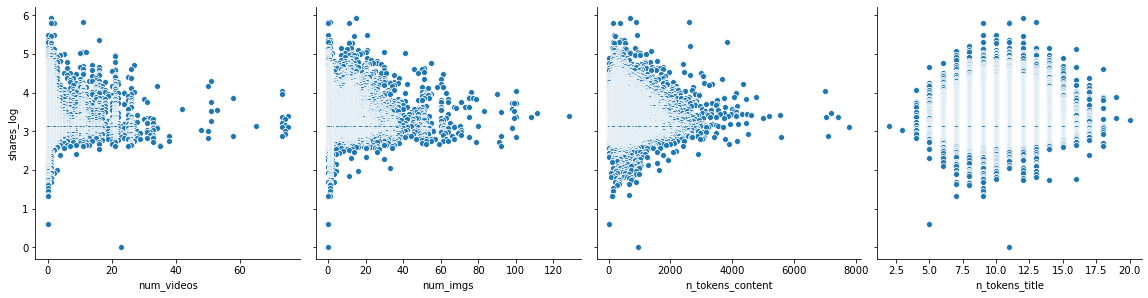

In [570]:
sns.pairplot(df, x_vars=['num_videos', 'num_imgs', 'n_tokens_content', 'n_tokens_title'], 
             y_vars=['shares_log'], size=4, aspect=1, kind='scatter')
plt.show() #plot figure

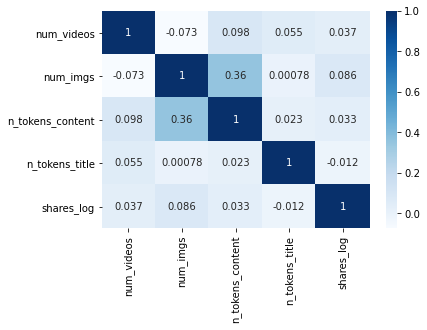

In [571]:
sns.heatmap(df.corr(), cmap='Blues', annot = True) #load correlation into heatmap
plt.show() #plot figure

In the heatmap we can see the num_imgs is the most correlated to shares_log. Therefore, we will use num_imgs as our feature variable to perform a linear regression model. To perform the model we first need to create $X$ and $Y$. We will assing the images as independent value $X$ and shares as the dependent value $Y$:

In [572]:
X = df['num_imgs']#creating X 
y = df['shares_log']#creating Y

Now we need to split the dataframe into a training and test set. For this we use train: 67%, test: 33%.

With the training set we can build and train the linear regression.

In [573]:
#reshape X and y value for creating the equation
X = df[['num_imgs']] #X.shape should be (N, M) where M >= 1  

y = df['shares_log'] #y.shape should be (N, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.63, test_size = 0.33, random_state = 100) #split X and y value in training and test set

lm = LinearRegression() #create a new model 
lm.fit(X_train, y_train) #fit the model with X_train and y_train

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.2f} + {b1:.3f}X") #.0f formats to 2 decimals. 

The regression line is equal to y = 3.23 + 0.004X


The equation for the model is:

$y = 3.23 + 0.004x$

We can also rewrite this equation as:

$shares = 3.23 + 0.004x$

We can plot this equation toghether with the train set:

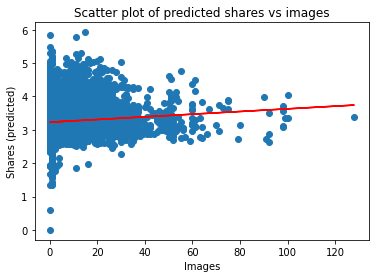

In [574]:
plt.scatter(X_train, y_train) #plot X_train and y_train in scatterplot to compare them with prediction
plt.plot(X_train, 3.23 + 0.004*X_train, 'r') #plot equation with X_train
plt.title('Scatter plot of predicted shares vs images') #set plot title
plt.xlabel('Images') #set xaxes name
plt.ylabel('Shares (predicted)') #set yaxes name
plt.show() #plot figure

In this plot we can see that the model predicts too high for low numbers of images, and a little too low for high number of images.

Before using the test set on the data, we first need to do a residual analysis:

In [575]:
shares_log_p = lm.predict(X_train) #generate the predictions and add them to the dataframe
df_shares_log_p = pd.DataFrame(shares_log_p, columns=['shares_log_p']) #create column in prediction dataframe for merging
#print(df_shares_log_p)

y_train = y_train.reset_index() #reset index to create column names
y_train.pop('index') #delete index column to create an equal amount of columns for resid_train
#print(y_train)

resid_train = y_train['shares_log'] - df_shares_log_p['shares_log_p'] #get the residuals by subtracting the prediction from the actual shares

With a plot we can see if the residuals are following any pattern:

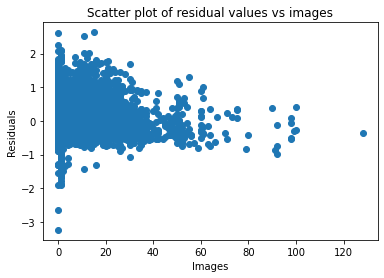

In [576]:
plt.scatter(X_train,resid_train)#use independent num_imgs toghether with residuals
plt.title('Scatter plot of residual values vs images') #set plot title
plt.xlabel('Images') #set xaxes name
plt.ylabel('Residuals') #set yaxes name
plt.show() #plot figure

Here we see the residuals are:

-  Unbiased, but homoscedastic. 

-  The SD is small to the right of the plot and large to the left. 

This means the residuals are heteroscadastic.

Now to predict the $R^2$:

In [577]:
r_squared_train = r2_score(y_train, shares_log_p) #use r2_score to calculate r_squared
r_squared_train

0.007143836351292121

Here we see, the $R^2$ value is 0.00714. 

Now we will evaluate the model on the test data:

In [578]:
shares_log_p_test = lm.predict(X_test) #generate the predictions and add them to the dataframe
#print(df_shares_log_p)

Now to predict the R^2 for the test set:

In [579]:
r_squared_test = r2_score(y_test, shares_log_p_test) #use r2_score to calculate r_squared
r_squared_test

0.007232516634355979

Here we see, the $R^2$ value is 0.00723. 

If we compare the $R^2$ of the training set with the $R^2$ of the test set, we can conclude the model is stable. This means we can use the model on the test set.

In [580]:
shares_log_p_test = lm.predict(X_test) #generate the predictions and add them to dataframe
df_shares_log_p_test = pd.DataFrame(shares_log_p_test, columns=['shares_log_p_test'])#create column in prediction dataframe for merging
df_shares_log_p_test = df_shares_log_p_test.reset_index()#add index column to dataframe for merging
#print(df_shares_log_p_test)

y_test = y_test.reset_index()#add index column to dataframe for merging
#print(y_test)

rmse = pd.merge(df_shares_log_p_test, y_test, on = 'index')#'index' is the common identifier
#print(rmse)

math.sqrt(mean_squared_error(rmse['shares_log'], rmse['shares_log_p_test'])) #this gives the model fit (R2) for the Y and predicted Y

0.4061940159700385

The RMSE is 0.406. This means we are about 0.406 log off in our predicted shares log. 